In [1]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

# Reading and Understanding Data

In [2]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# check the shape of the dataset
df.shape

(9240, 37)

In [4]:
# check statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
# check whether there are any duplicates
df.duplicated().sum()

0

In [6]:
#Lets have a look at all the columns, their datatypes and also get an idea of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
* A large number of columns have null values. Those columns should ideally be dropped
* `Prospect ID` and `Lead Number` both serve the same purpose. They are both unique identifiers. We will drop `Prospect ID`
* Column names are just too long. We will modify the column names
* Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

## Data Cleaning

### Rename column names

* Long column names make analysis tiring as one has to always refer to column names. Also has impact on charts created later on
* Ideally, we should follow python's preferred Snakecase nomenclature

In [7]:
# change nomenclature to snakecase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
 # shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


### Drop `prospect_id` column

In [9]:
df.drop('prospect_id', axis = 1, inplace = True)

### Replace "Select" category with null values

In [10]:
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


There are 4 columns that contains `Select`, which are effectively null values. We are going to make that change 

In [11]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

### Handle null values and sales generated columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [12]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

**Observation**: As can be seen, there are quite a few columns with high number of missing data. Since there are no ways to get data back from reliable sources, we can drop all those columns that have missing values > 40%

#### Drop columns that have null values > 40% or Sales generated columns

In [13]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [14]:
# Lets look at what are we left with
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

**Observations**
<br>There are five columns that still have high null values: `country`, `specialization`, `occupation`, `course_selection_reason`, and `city`. We will look at them individually to see what can be done

#### `country` column

In [15]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

**Observation**
<br> The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

#### `course_selection_reason` column

In [16]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

**Observation**
<br> The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [17]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

**Observation**
<br> For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias

In [18]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [19]:
df.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

#### `specialization` column

In [20]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**Observation**
<br> For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias

In [21]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [22]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [23]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

#### `city` column

**Observations**
We will categorize cities based on logical decisions and impute proportionately

In [24]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [25]:
df.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [26]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

### Handle categorical columns with low number of missing values and low representation of categories

In this step, we will go through the rest of the categorical columns one by one and
* Merge categories that have low representation
* Impute the missing values

In [27]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                  0.00
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                            0.00
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [28]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
country = 38
specialization = 3
occupation = 3
course_selection_reason = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
<br> As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
* `lead_origin`
* `lead_source`

#### `lead_origin` column

In [29]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [30]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

#### `lead_source` column

In [31]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [32]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [33]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

### Handle Binary columns

* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns

In [34]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



**Observations**
<br> Because of heavy data imbalance, we can drop the following columns as well
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

**Observations**
<br> Because of heavy data imbalance, we can drop the following columns as well
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [35]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

### Handle Numerical columns

#### `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object

In [36]:
df.lead_number = df.lead_number.astype('object')

#### `total_visits` column

For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

In [37]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

#### `page_views_per_visit` column

Handle missing values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_number              9240 non-null   object 
 1   lead_origin              9240 non-null   object 
 2   lead_source              9240 non-null   object 
 3   do_not_email             9240 non-null   object 
 4   converted                9240 non-null   int64  
 5   total_visits             9240 non-null   int32  
 6   time_on_website          9240 non-null   int64  
 7   page_views_per_visit     9103 non-null   float64
 8   country                  6779 non-null   object 
 9   specialization           9240 non-null   object 
 10  occupation               6550 non-null   object 
 11  course_selection_reason  6531 non-null   object 
 12  city                     9240 non-null   object 
 13  mastering_interview      9240 non-null   object 
dtypes: float64(1), int32(1),

## Exploratory Data Analysis

### Numerical columns

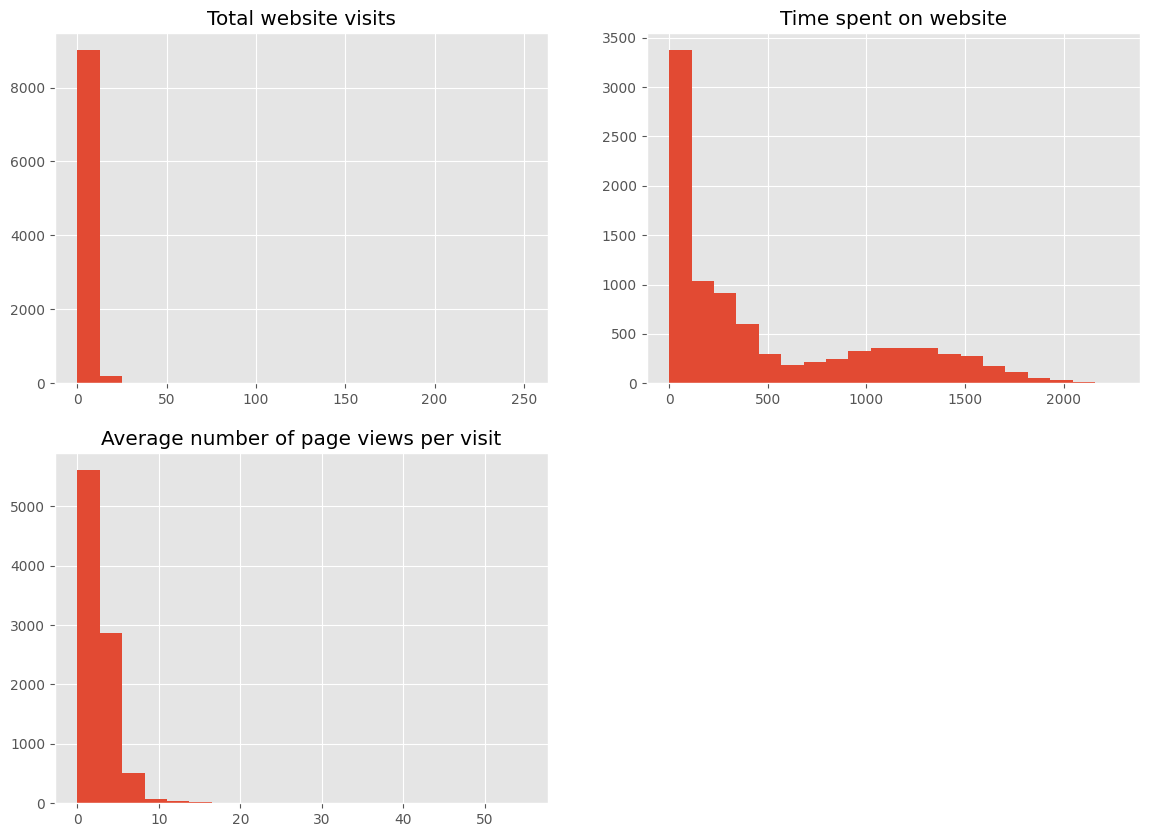

In [39]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**
- High peaks and skewed data. There might be a possibility of outliers. We will check them next

#### Heatmap

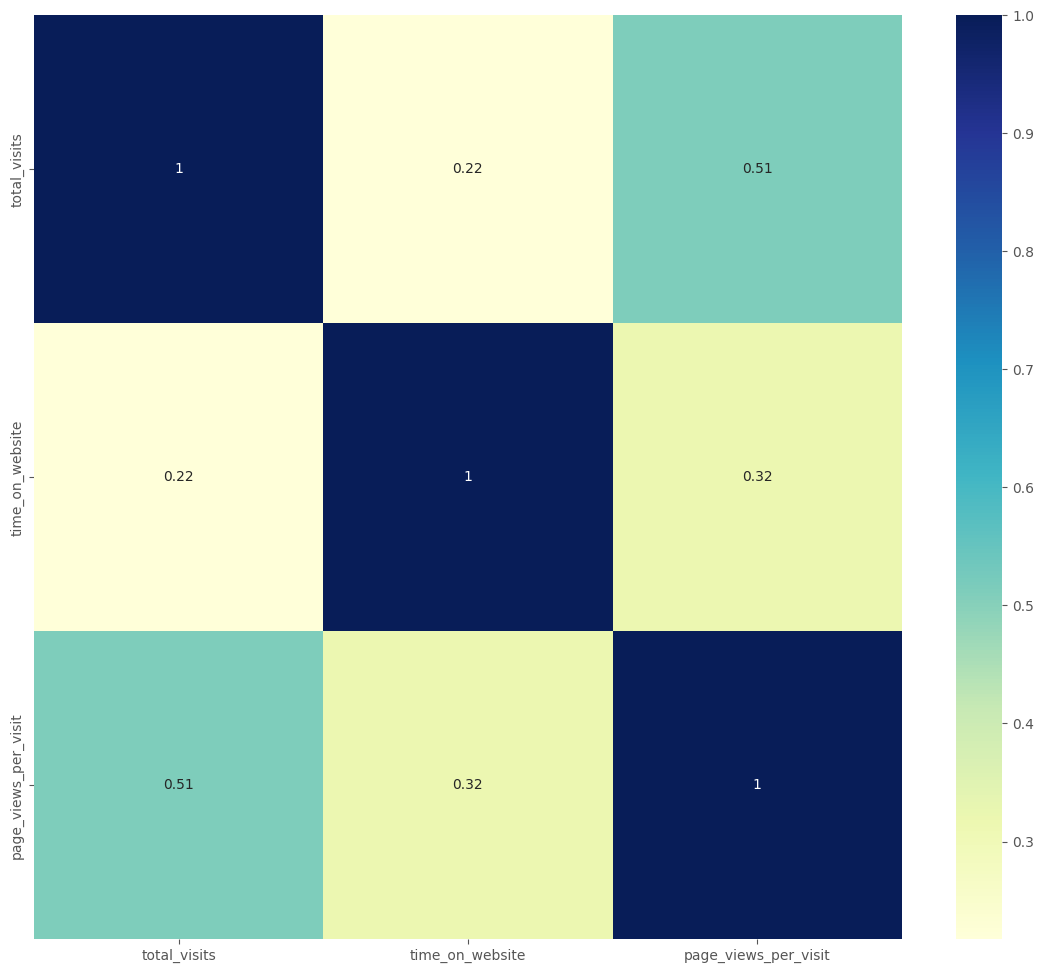

In [40]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**: No significaqnt correlation such that columns can be dropped

#### Check for outliers

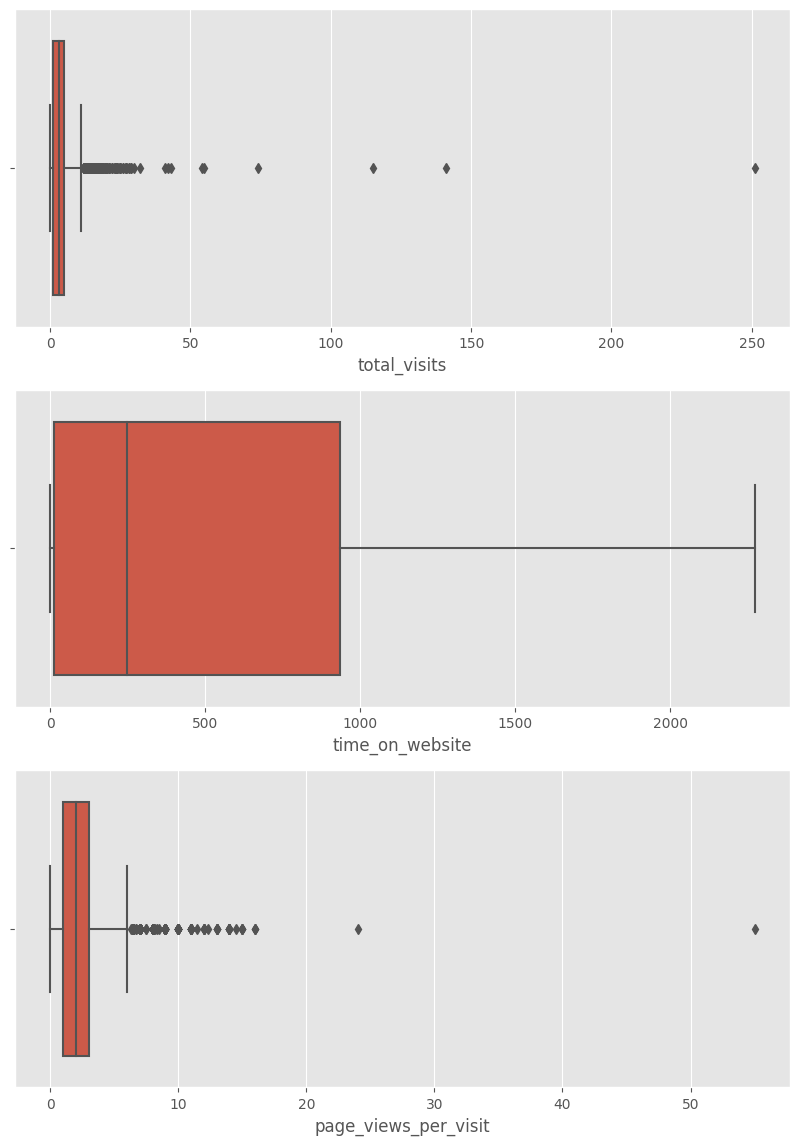

In [41]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

### Categorical columns

#### Lead Origin

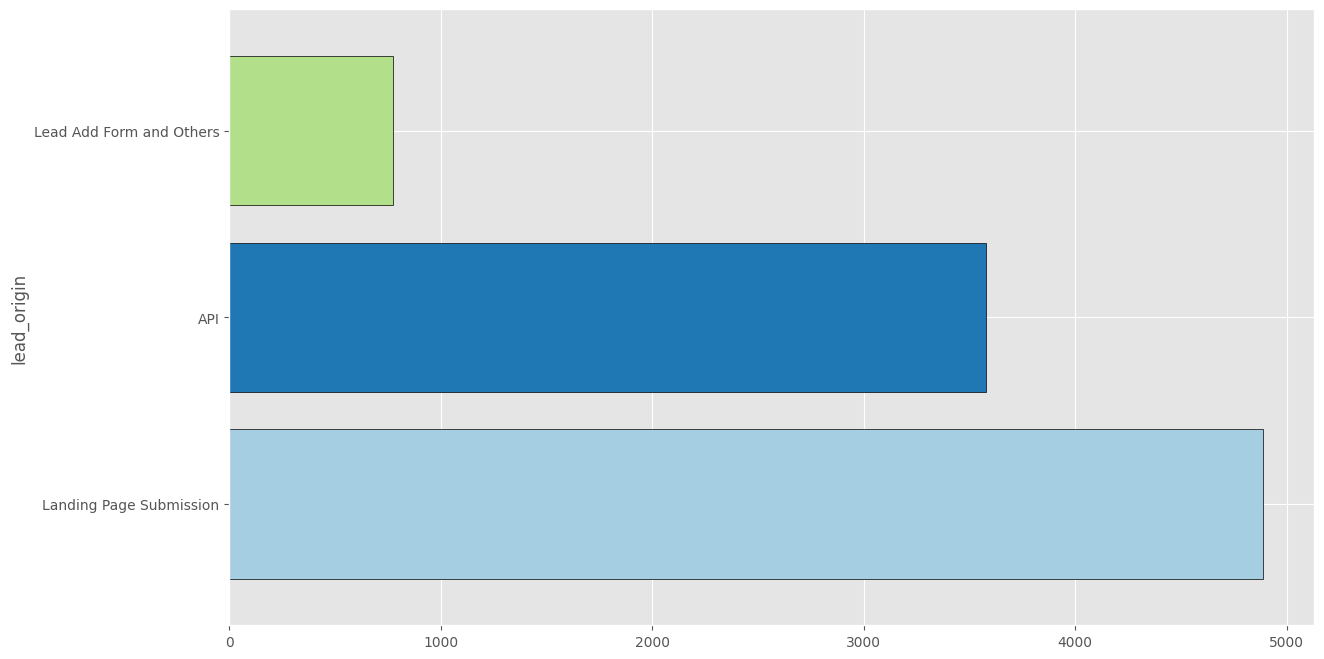

In [42]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [43]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,NaN,Management Specializations,Unemployed,Better Career Prospects,Non-Mumbai Maharashtra Cities,No


#### Lead Source

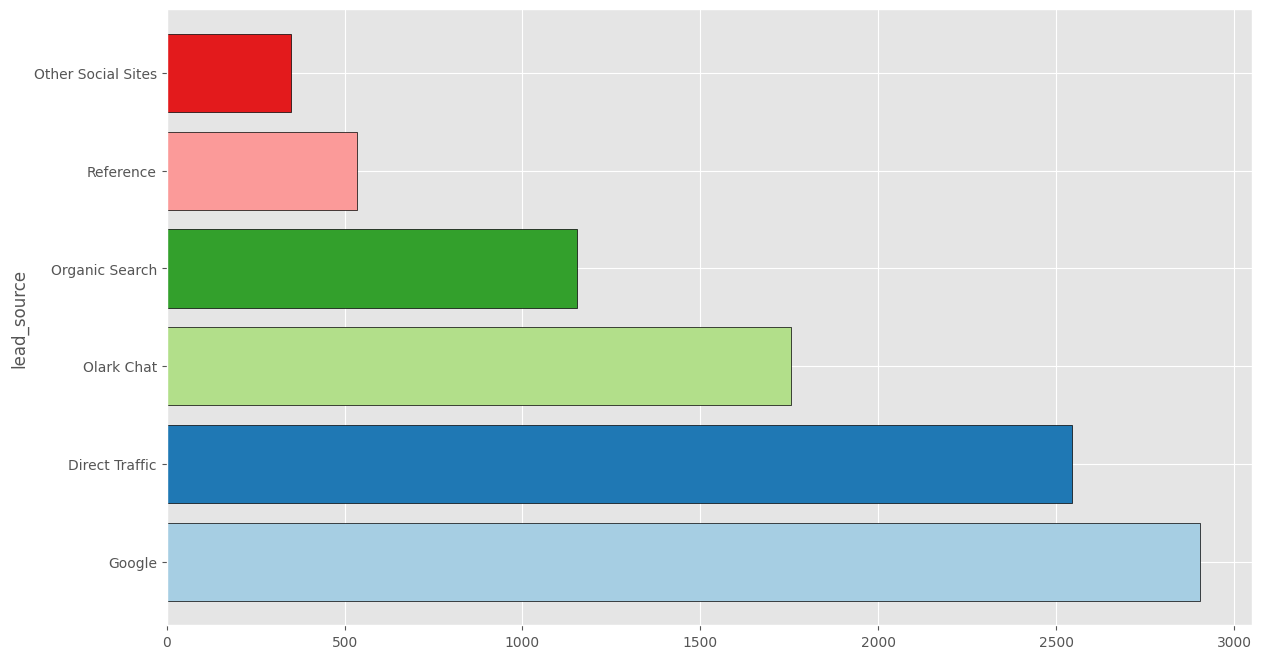

In [44]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

#### Specialization

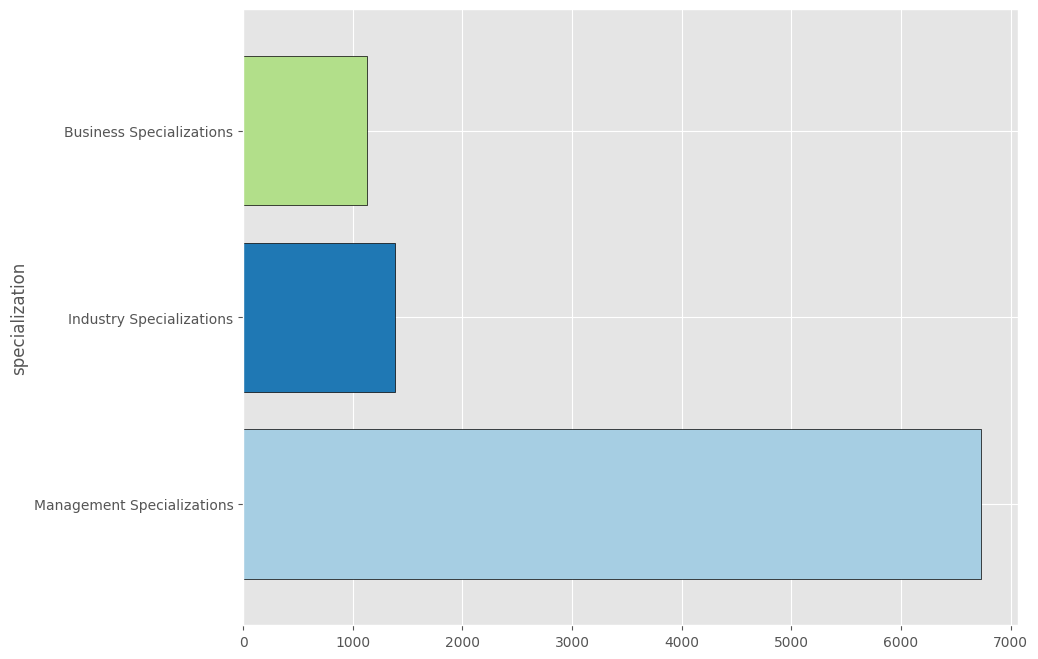

In [45]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Most of the speciliazation taken are management

#### Occupation

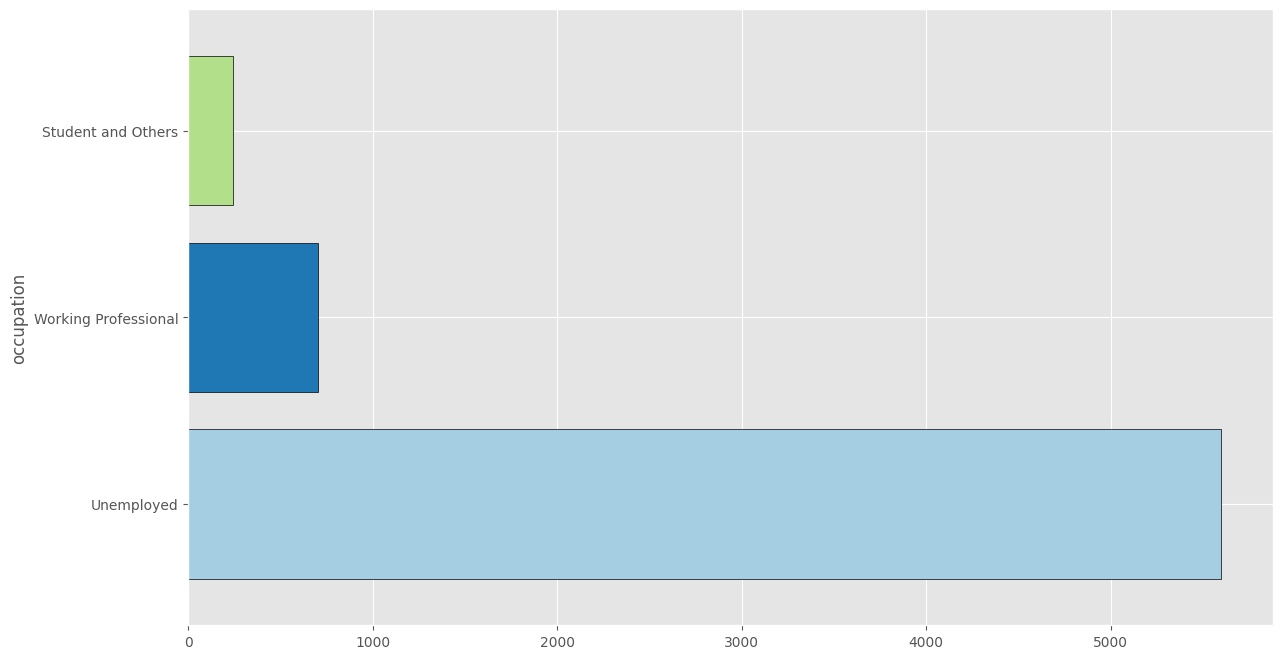

In [46]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Unempployed users are the most significant leads

#### City

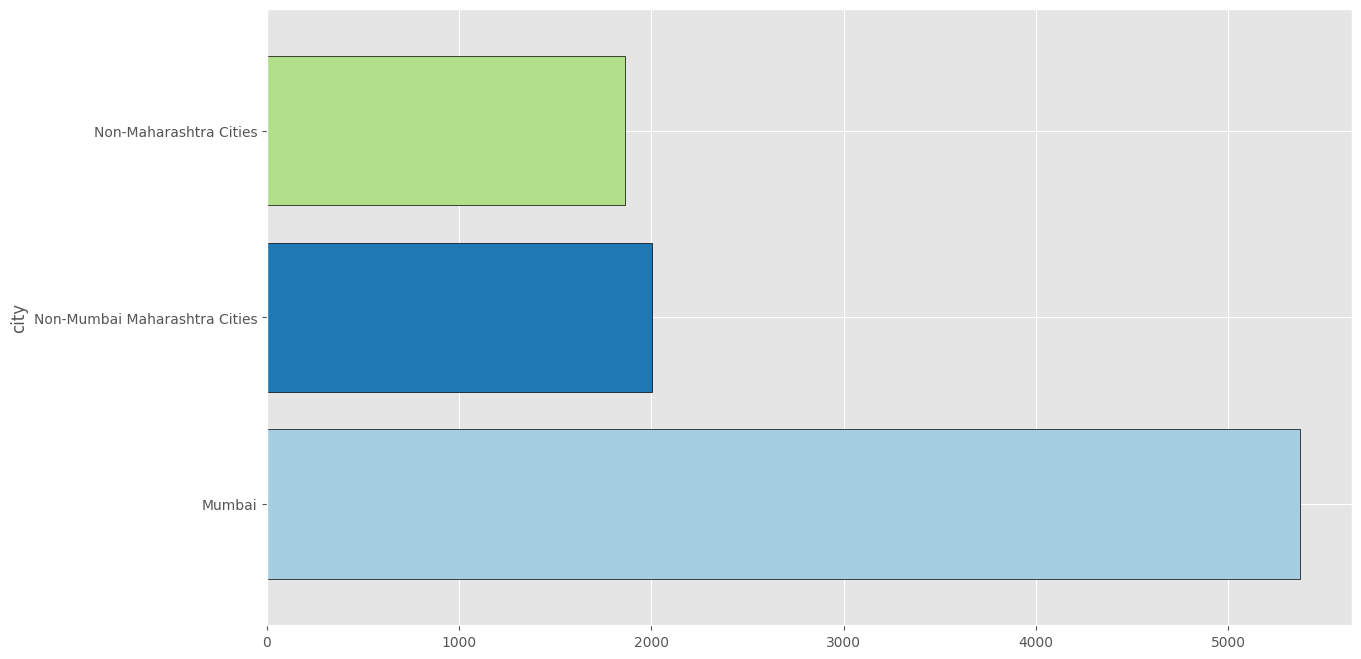

In [47]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Mumbai in particular and Maharashtra in general dominates the lead. This is likely due to the fact that the courses are based in Mumbai

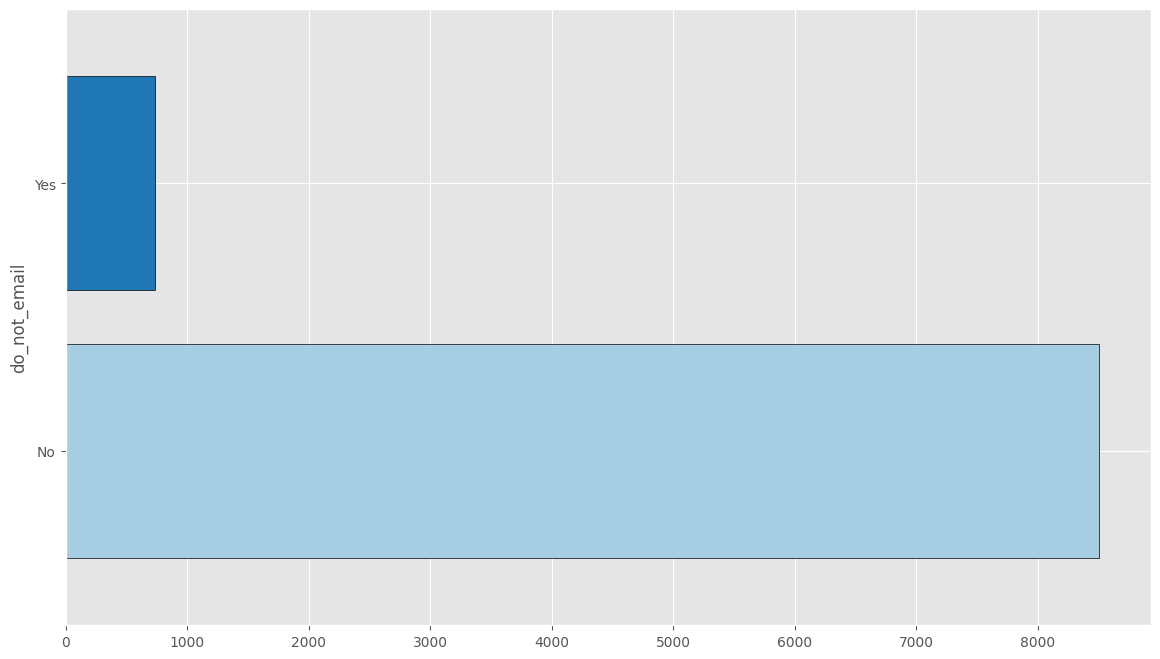

In [48]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

## Data Preparation

### Converting Binary (Yes/No) to 0/1

In [49]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
country = 38
specialization = 3
occupation = 3
course_selection_reason = 3
city = 3
mastering_interview = 2


We have two binary columns: `do_not_email`, `mastering_interview`

In [50]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,NaN,Management Specializations,Unemployed,Better Career Prospects,Non-Mumbai Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.50,India,Management Specializations,Unemployed,Better Career Prospects,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,India,Business Specializations,Student and Others,Better Career Prospects,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,India,Industry Specializations,Unemployed,Better Career Prospects,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,India,Management Specializations,Unemployed,Better Career Prospects,Mumbai,0


### Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [52]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,country,course_selection_reason,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,NaN,Better Career Prospects,0,0,0,0,1,0,0,0,0,1,1,0,0,1
1,660728,0,0,5,674,2.50,India,Better Career Prospects,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,660727,0,1,2,1532,2.00,India,Better Career Prospects,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,India,Better Career Prospects,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,India,Better Career Prospects,0,1,0,1,0,0,0,0,0,1,1,0,0,0


### Outliers Treatment

In [53]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9103.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.16
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [54]:
# capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

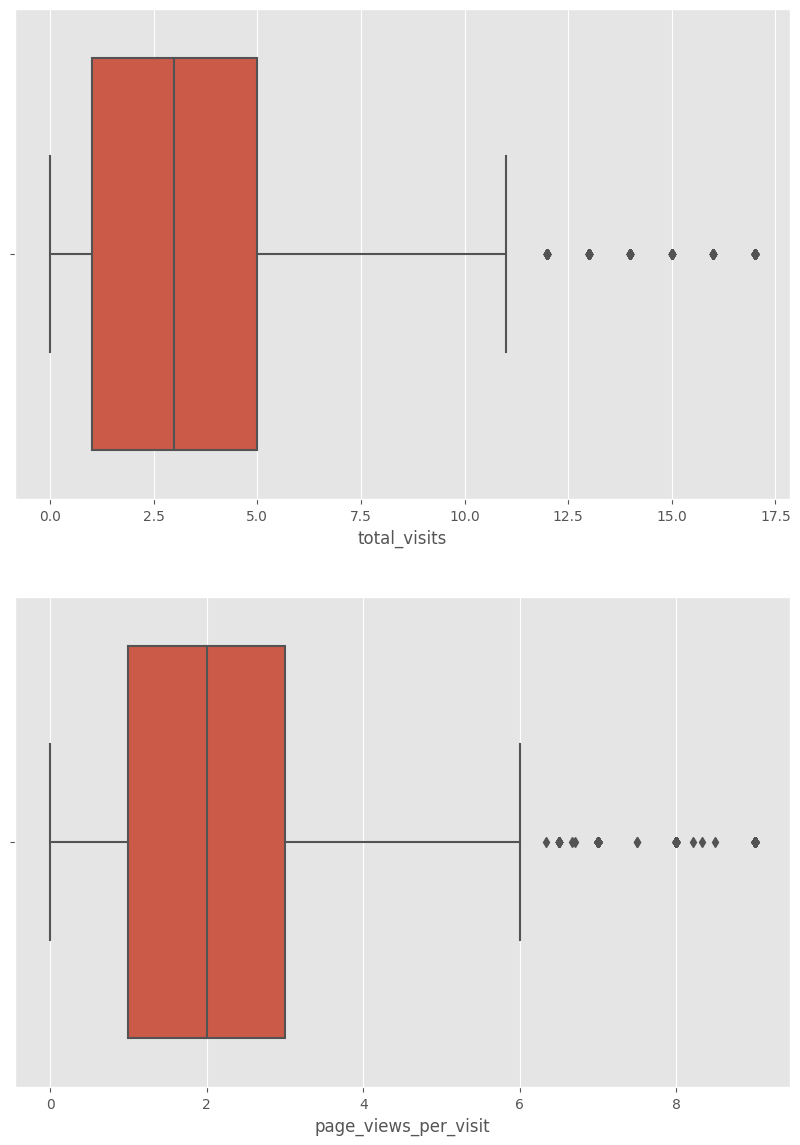

In [55]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

As we can see, we were able to significantly reduce the number of outliers by capping

### Test-Train Split

In [56]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,country,course_selection_reason,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,NaN,Better Career Prospects,0,0,0,0,1,0,0,0,0,1,1,0,0,1


In [57]:
# Putting response variable to y
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [59]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,country,course_selection_reason,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.17,NaN,Better Career Prospects,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.21,0.01,-0.50,India,Better Career Prospects,1,1,0,0,0,0,0,0,0,1,1,0,1,0
3516,0,0.51,-0.69,0.09,NaN,Better Career Prospects,0,0,0,0,1,0,0,0,0,0,1,0,0,1
8105,0,0.51,1.37,1.35,India,Better Career Prospects,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.02,-0.89,-1.17,NaN,Better Career Prospects,0,0,0,0,1,0,0,0,0,1,1,0,0,1


In [60]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

The conversion rate is 38.5%

### Looking at correlations

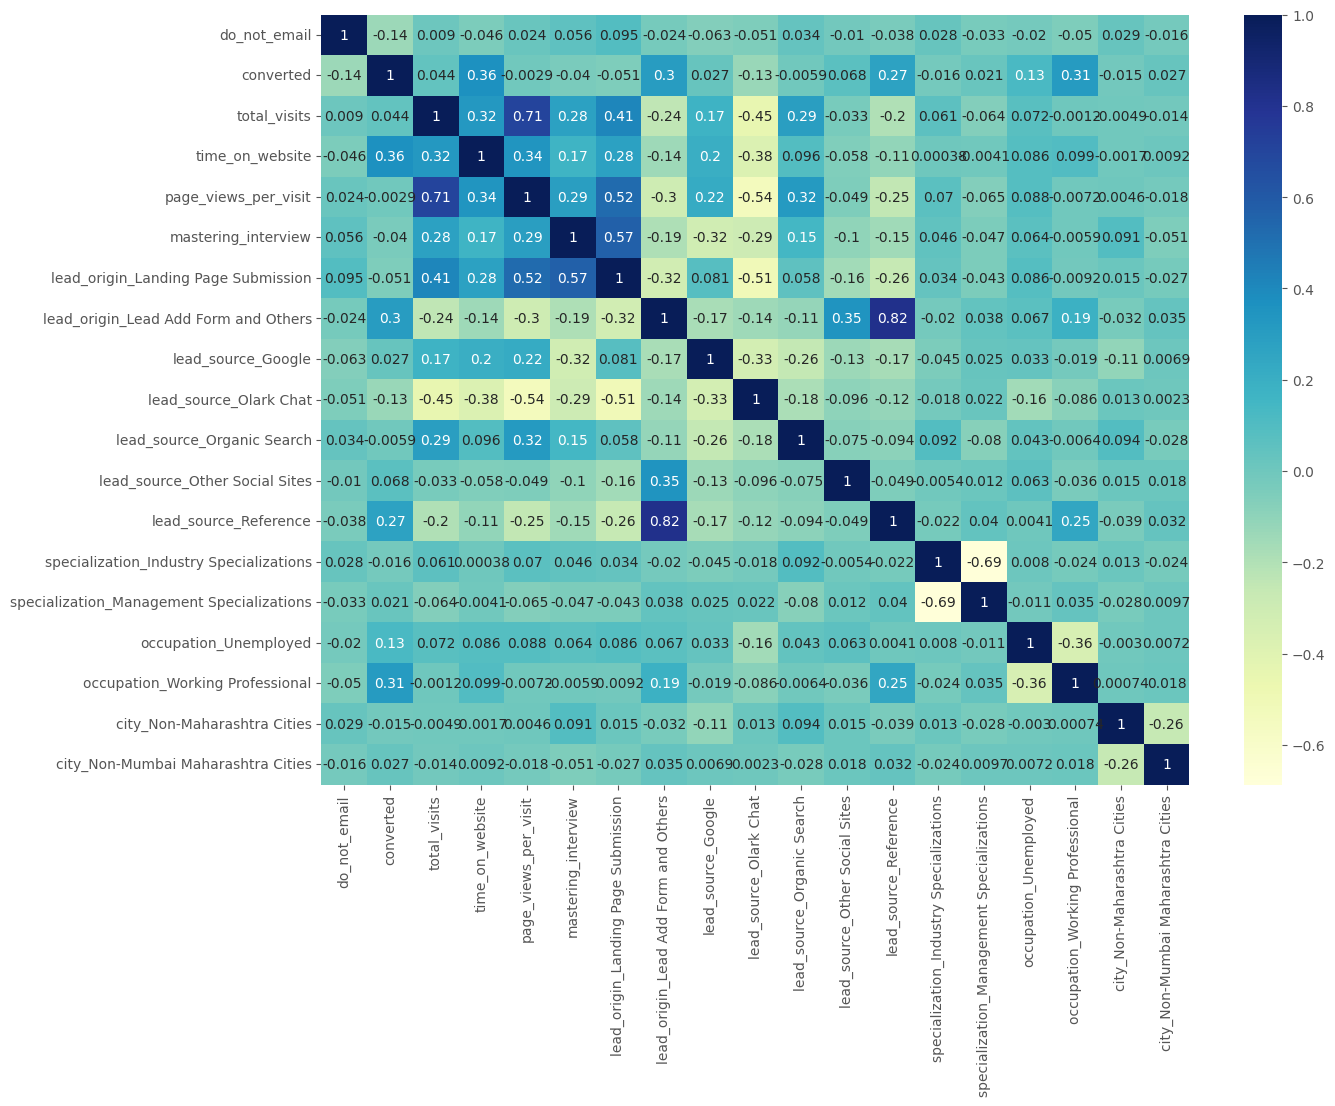

In [61]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### Drop highly correlated dummy variables

In [62]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

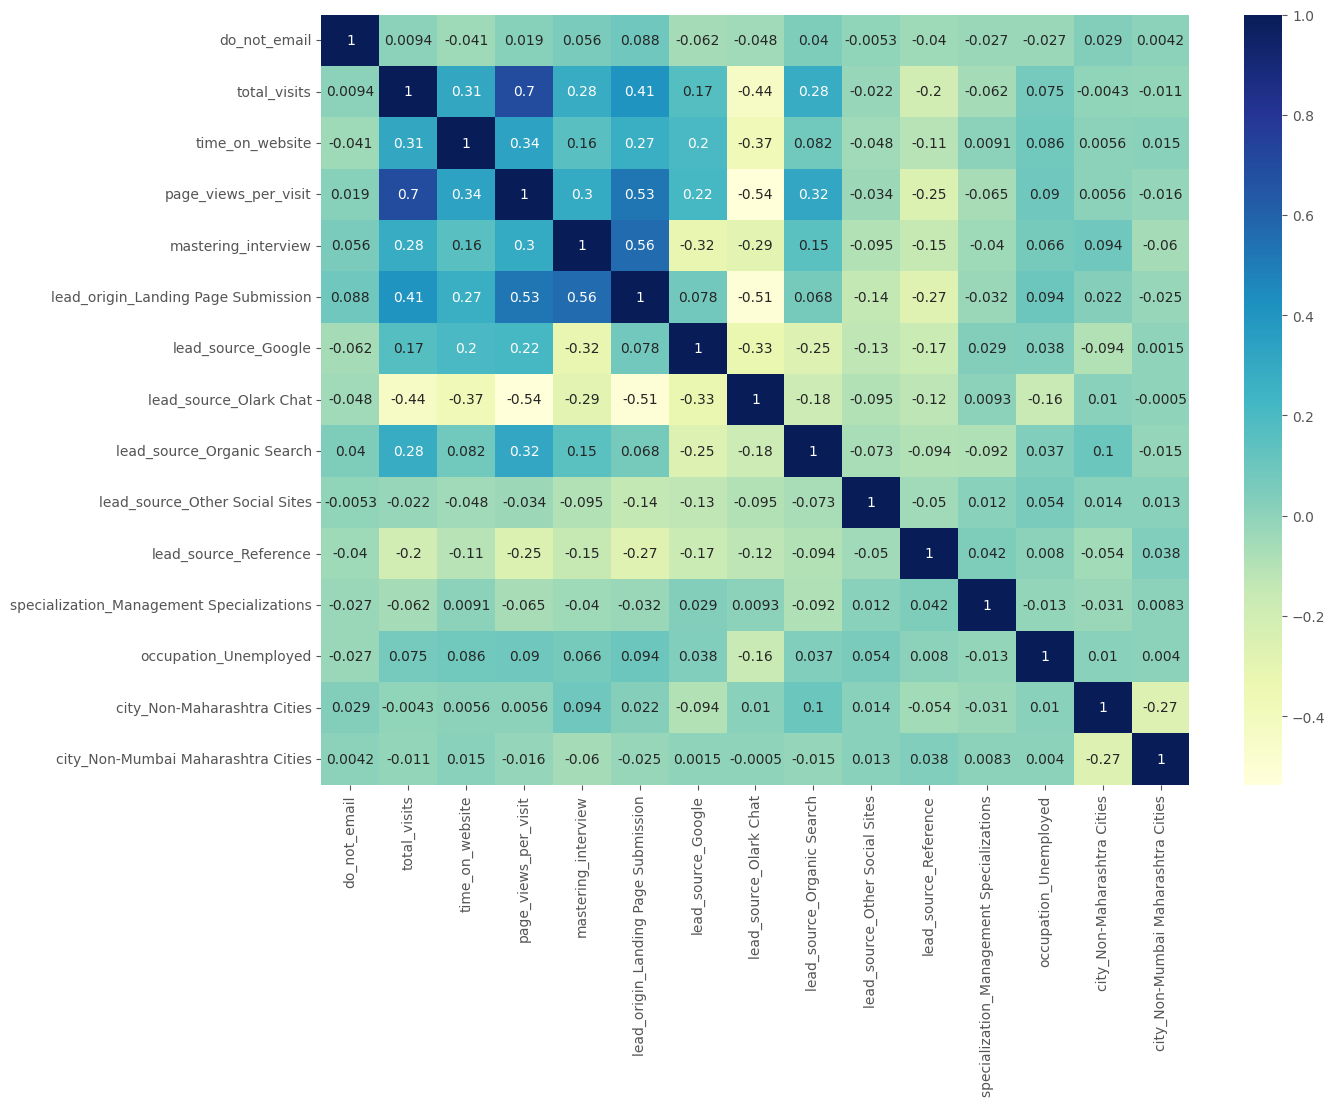

In [63]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

#  Building a Model

In [64]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [ ]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [ ]:
# Import statsmodels

import statsmodels.api as sm

In [ ]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [ ]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [ ]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

The variable Lead Profile_Dual Specialization Student also needs to be dropped.

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [ ]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

Drop What is your current occupation_Housewife.

In [ ]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

Drop What is your current occupation_Working Professional.

In [ ]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Step 3: Model Evaluation¶
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [ ]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

In [ ]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [ ]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [ ]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [ ]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)

Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

In [ ]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show(

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Sensitivity

TP/(TP+FN)

In [ ]:
# Calculate Specificity

TN/(TN+FP)

####Step 4: Making Predictions on the Test Set

In [ ]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

In [ ]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [ ]:
# Check X_test_sm

X_test_sm

In [ ]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate sensitivity
TP / float(TP+FN)

In [ ]:
# Calculate specificity
TN / float(TN+FP)

##Precision-Recall View

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

Recall¶
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Precision and recall tradeoff¶

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculate Precision

TP/(TP+FP)

# Calculate Recall

TP/(TP+FN)

# Step 4: Making Predictions on the Test Set¶
Let's now make predicitons on the test set.

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

In [ ]:
# Calculate Recall

TP/(TP+FN)